In [1]:
import numpy as np
from focusfeedbackgui import cylinderlens

# Perform a calibration

Using channels (1,), sigma: [1.7213698630136984] px


Fitting localisations:   0%|          | 0/10100 [00:00<?, ?it/s]

θ = 0.033326426187153826 ± 0.0002613949649348547


Fitting localisations:   0%|          | 0/10100 [00:00<?, ?it/s]

To put in CylLensGUI config file:
[cyllens_name]100x16:
  q: [0.7697627142437701, 0.15991483657902406, 0.2235652887052556, 0.46667530259342305, 0.07581335221047193, 0.3602281437568156, 0.4449278099414498, 3.354573060966511, 1.1910762549131606]
  theta: 0.033326426187153826


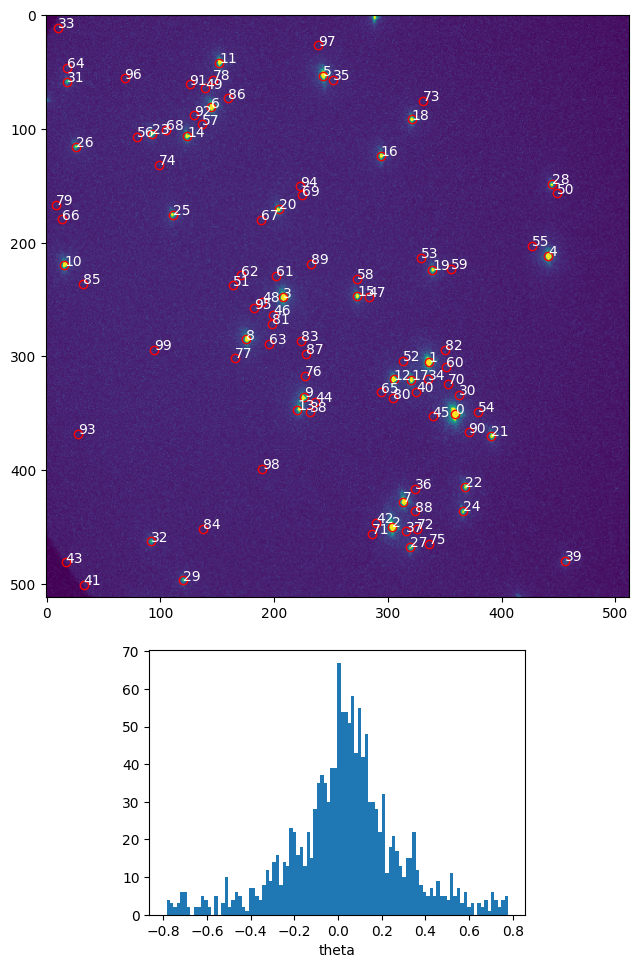

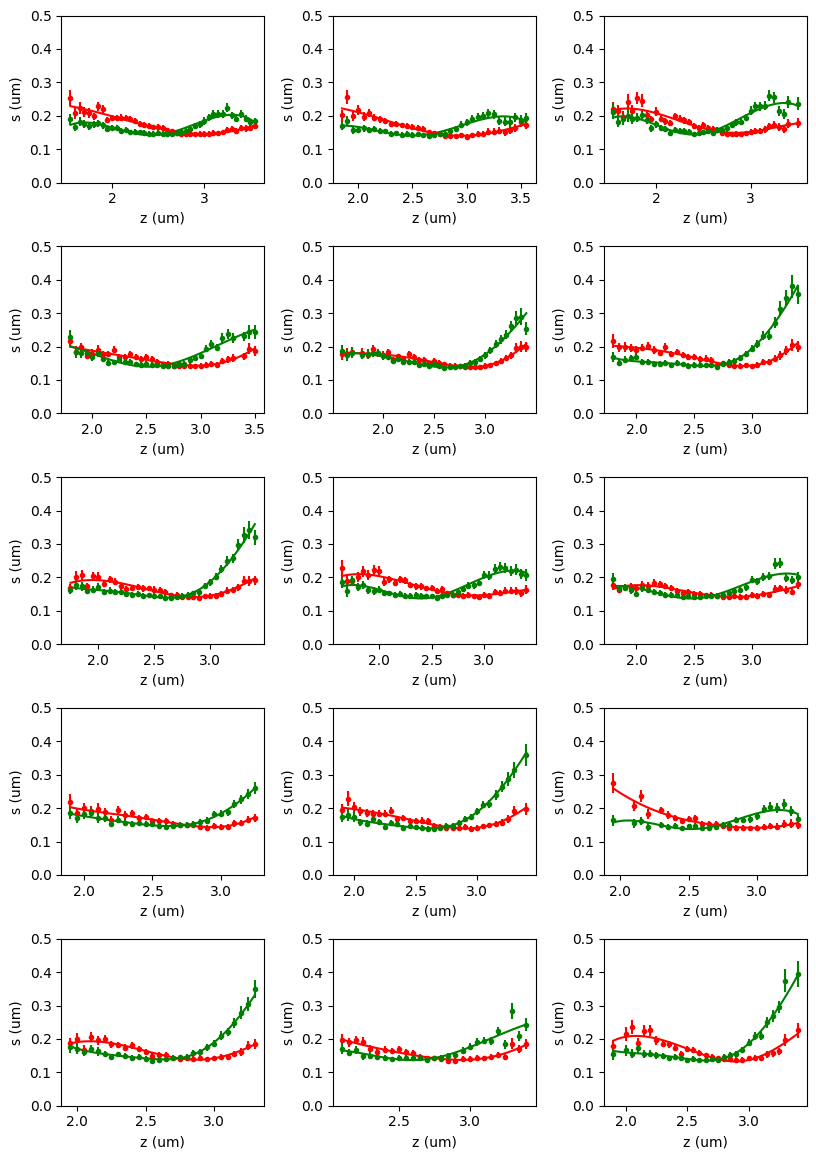

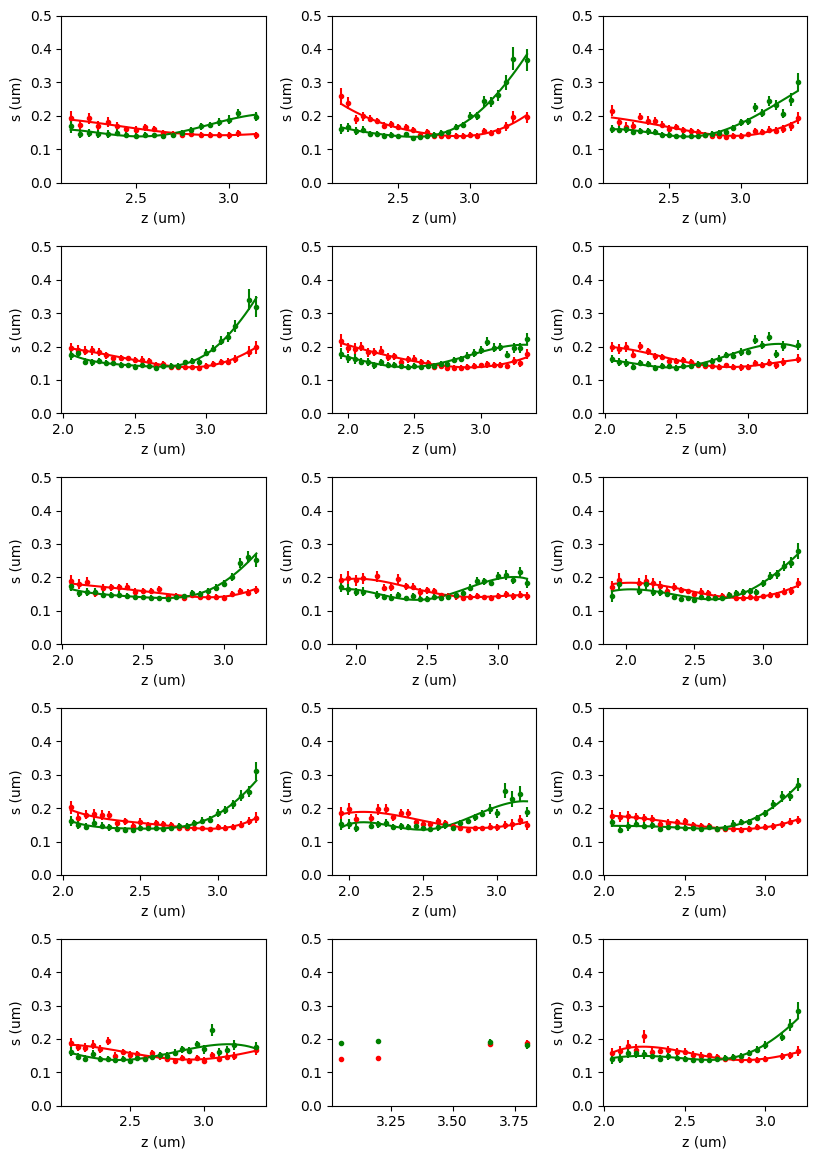

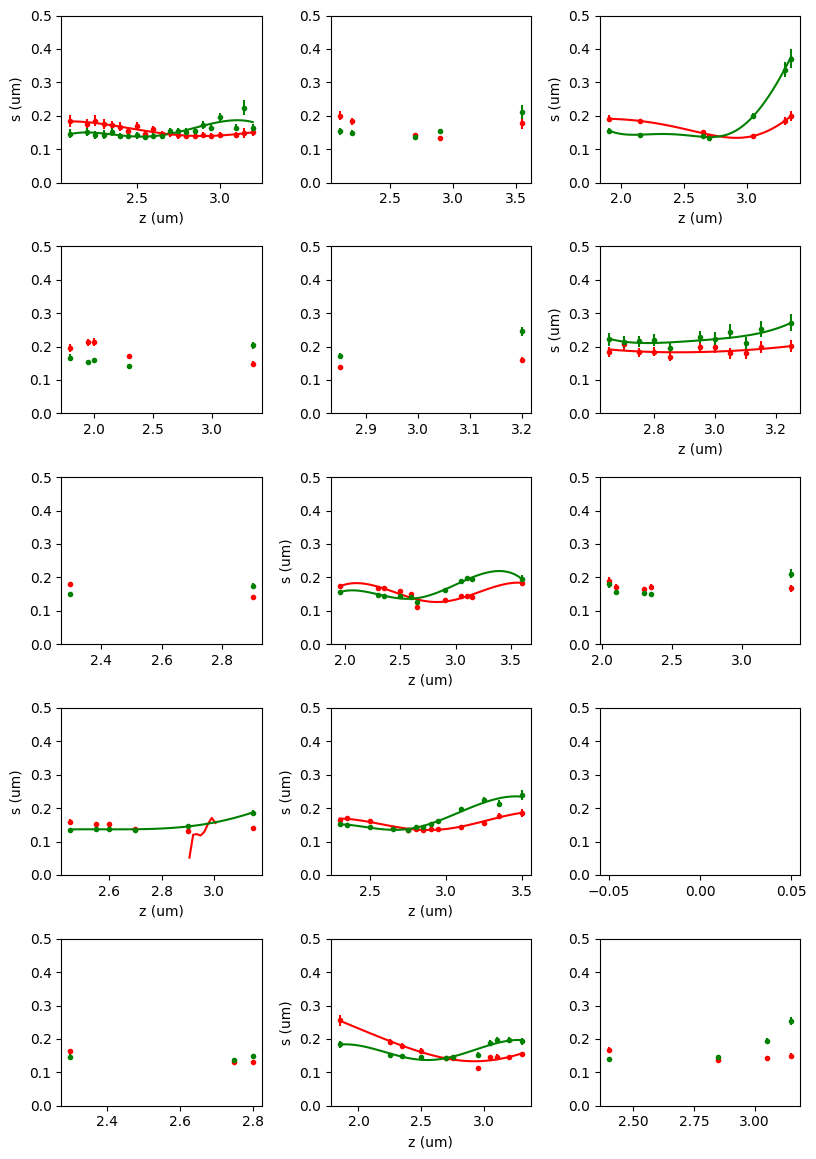

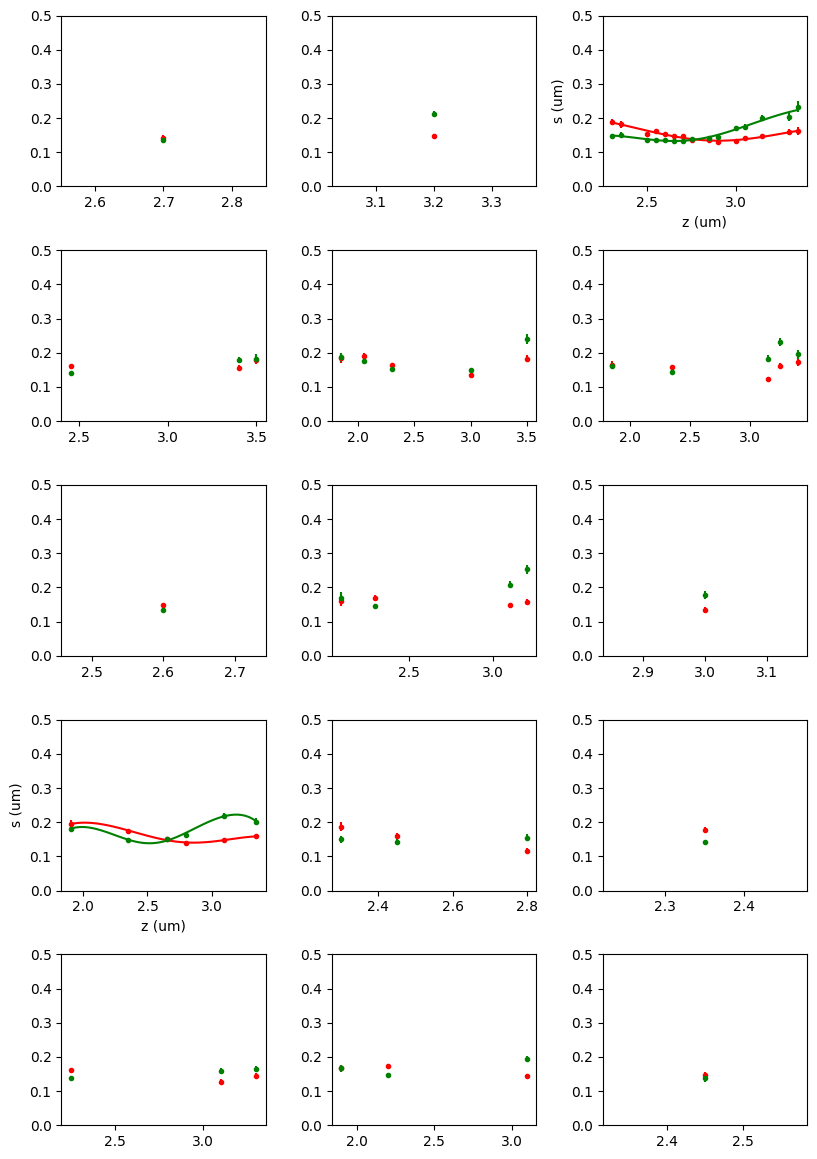

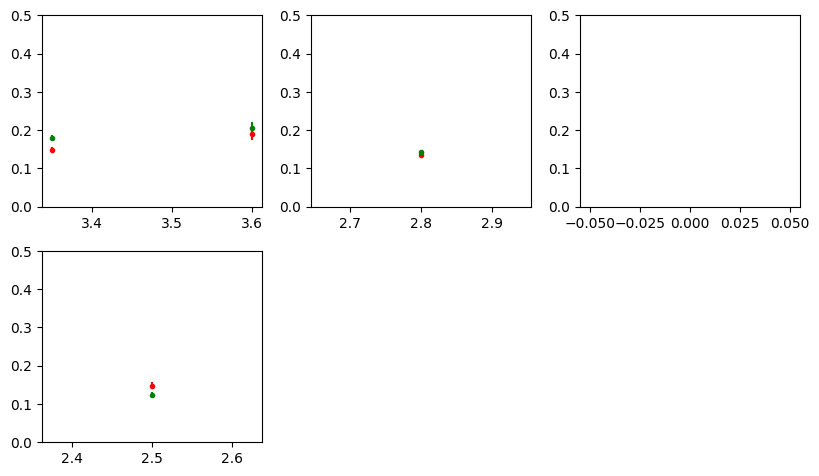

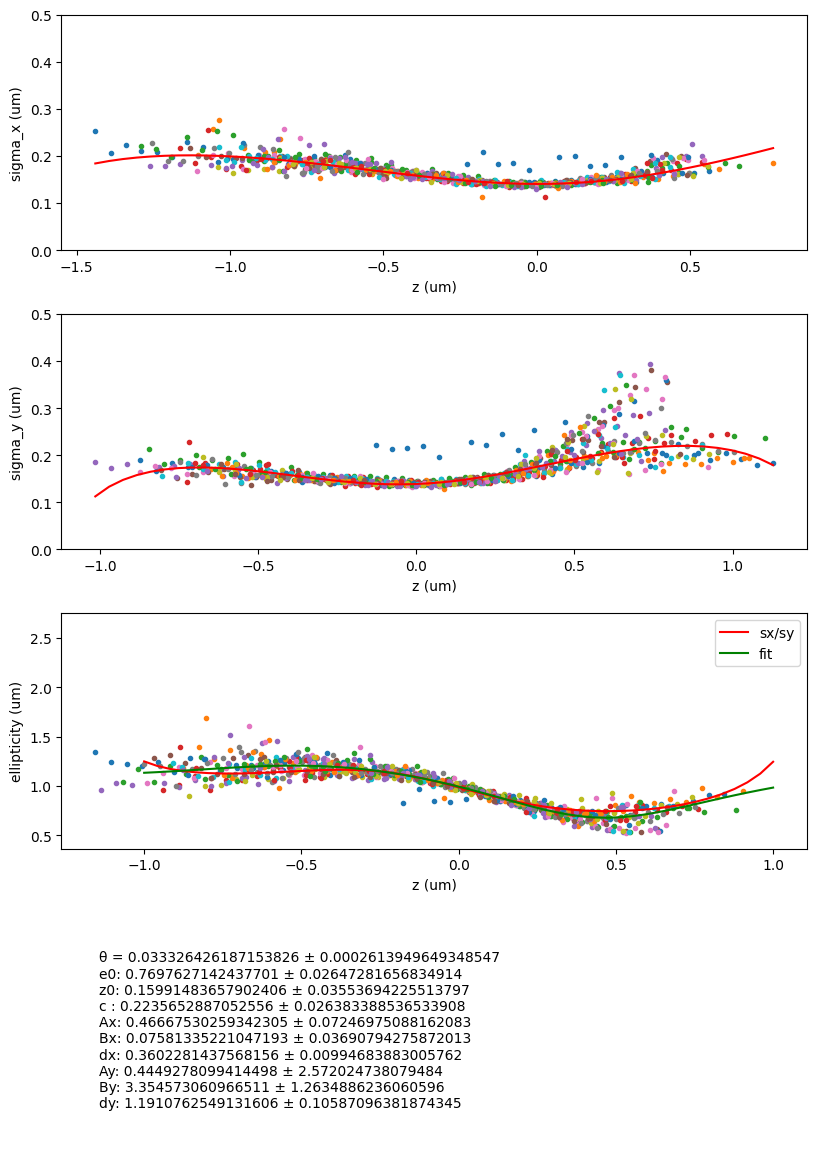

In [2]:
res = cylinderlens.calibrate_z("/DATA/lenstra_lab/w.pomp/data/20190417/20_beads.czi", (642, 488), (1,))

# Assess the performance of the focus feedback system

In [3]:
# get calibration parameters, bead z positions and elipticities from the calibration

q = res["q"]  # calibration parameters
Ze = res["Ze"]  # z position wrt. to focus
E = res["E"]  # ellipticity

Usable range: 571 nm
Standard deviation of the error: 68 nm


(570.8720524831309, 68.20013426071522)

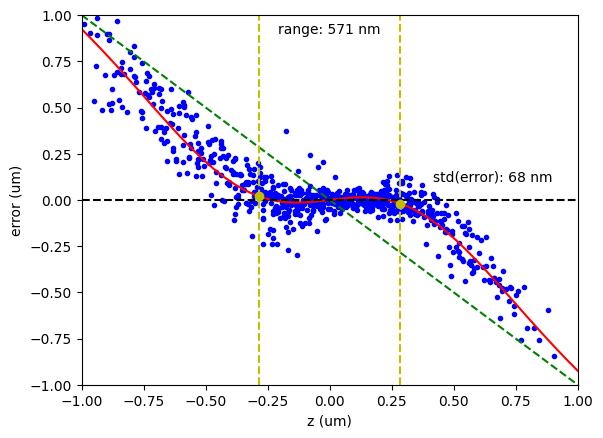

In [4]:
# position error vs. position wrt to focus
# yellow lines show the range in which the particle can be found and brought back to focus
# in that range, accuracy of finding the focus from the ellipticy is given by
#     the standard deviation of the error
cylinderlens.error_plot(Ze, np.array([cylinderlens.find_z(e, q) for e in E]) - Ze)